In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from pathlib import Path
from toolz import pluck
import sys

import networkx as nx
import streamlit as st
import pandas as pd

import matplotlib.pyplot as plt
import visJS2jupyter.visJS_module
import netwulf as nw

sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')

from aspects.data_io.serializer import Serializer
from aspects.utilities.data_paths import ExperimentPaths
from aspects.aspects.aspects_graph_builder import sort_networkx_attibutes
from aspects.visualization.drawing import draw_tree

%matplotlib inline

In [4]:
serializer = Serializer()

In [5]:
RESULTS_PATH = Path('/home/laugustyniak/github/phd/sentiment-backend/aspects/results/reviews_Cell_Phones_and_Accessories-50000-docs/')

In [6]:
our_paths = ExperimentPaths('', RESULTS_PATH, 'our')
gerani_paths = ExperimentPaths('', RESULTS_PATH, 'gerani')

paths = our_paths

In [18]:
# aspect_sentiments = dict(serializer.load(paths.aspect_sentiments))

In [7]:
aht = serializer.load(paths.aspect_hierarchical_tree)
aht_net_wulf_config = serializer.load('aspect_hierarchical_tree_netwulf_config.pkl')
stylized_network, config = nw.visualize(aht, config=aht_net_wulf_config, plot_in_cell_below=False)

File loaded: /home/laugustyniak/github/phd/sentiment-backend/aspects/results/reviews_Cell_Phones_and_Accessories-50000-docs/our/aspect_hierarchical_tree.pkl
File loaded: aspect_hierarchical_tree_netwulf_config.pkl


In [8]:
# fig, ax = nw.draw_netwulf(stylized_network, figsize=30)
# plt.show()

In [9]:
aspect_with_max_pagerank = sort_networkx_attibutes(nx.get_node_attributes(aht, 'pagerank'))[0]
aspect_with_max_pagerank

'button'

In [10]:
aht_gerani_based = nx.bfs_tree(aht, aspect_with_max_pagerank)

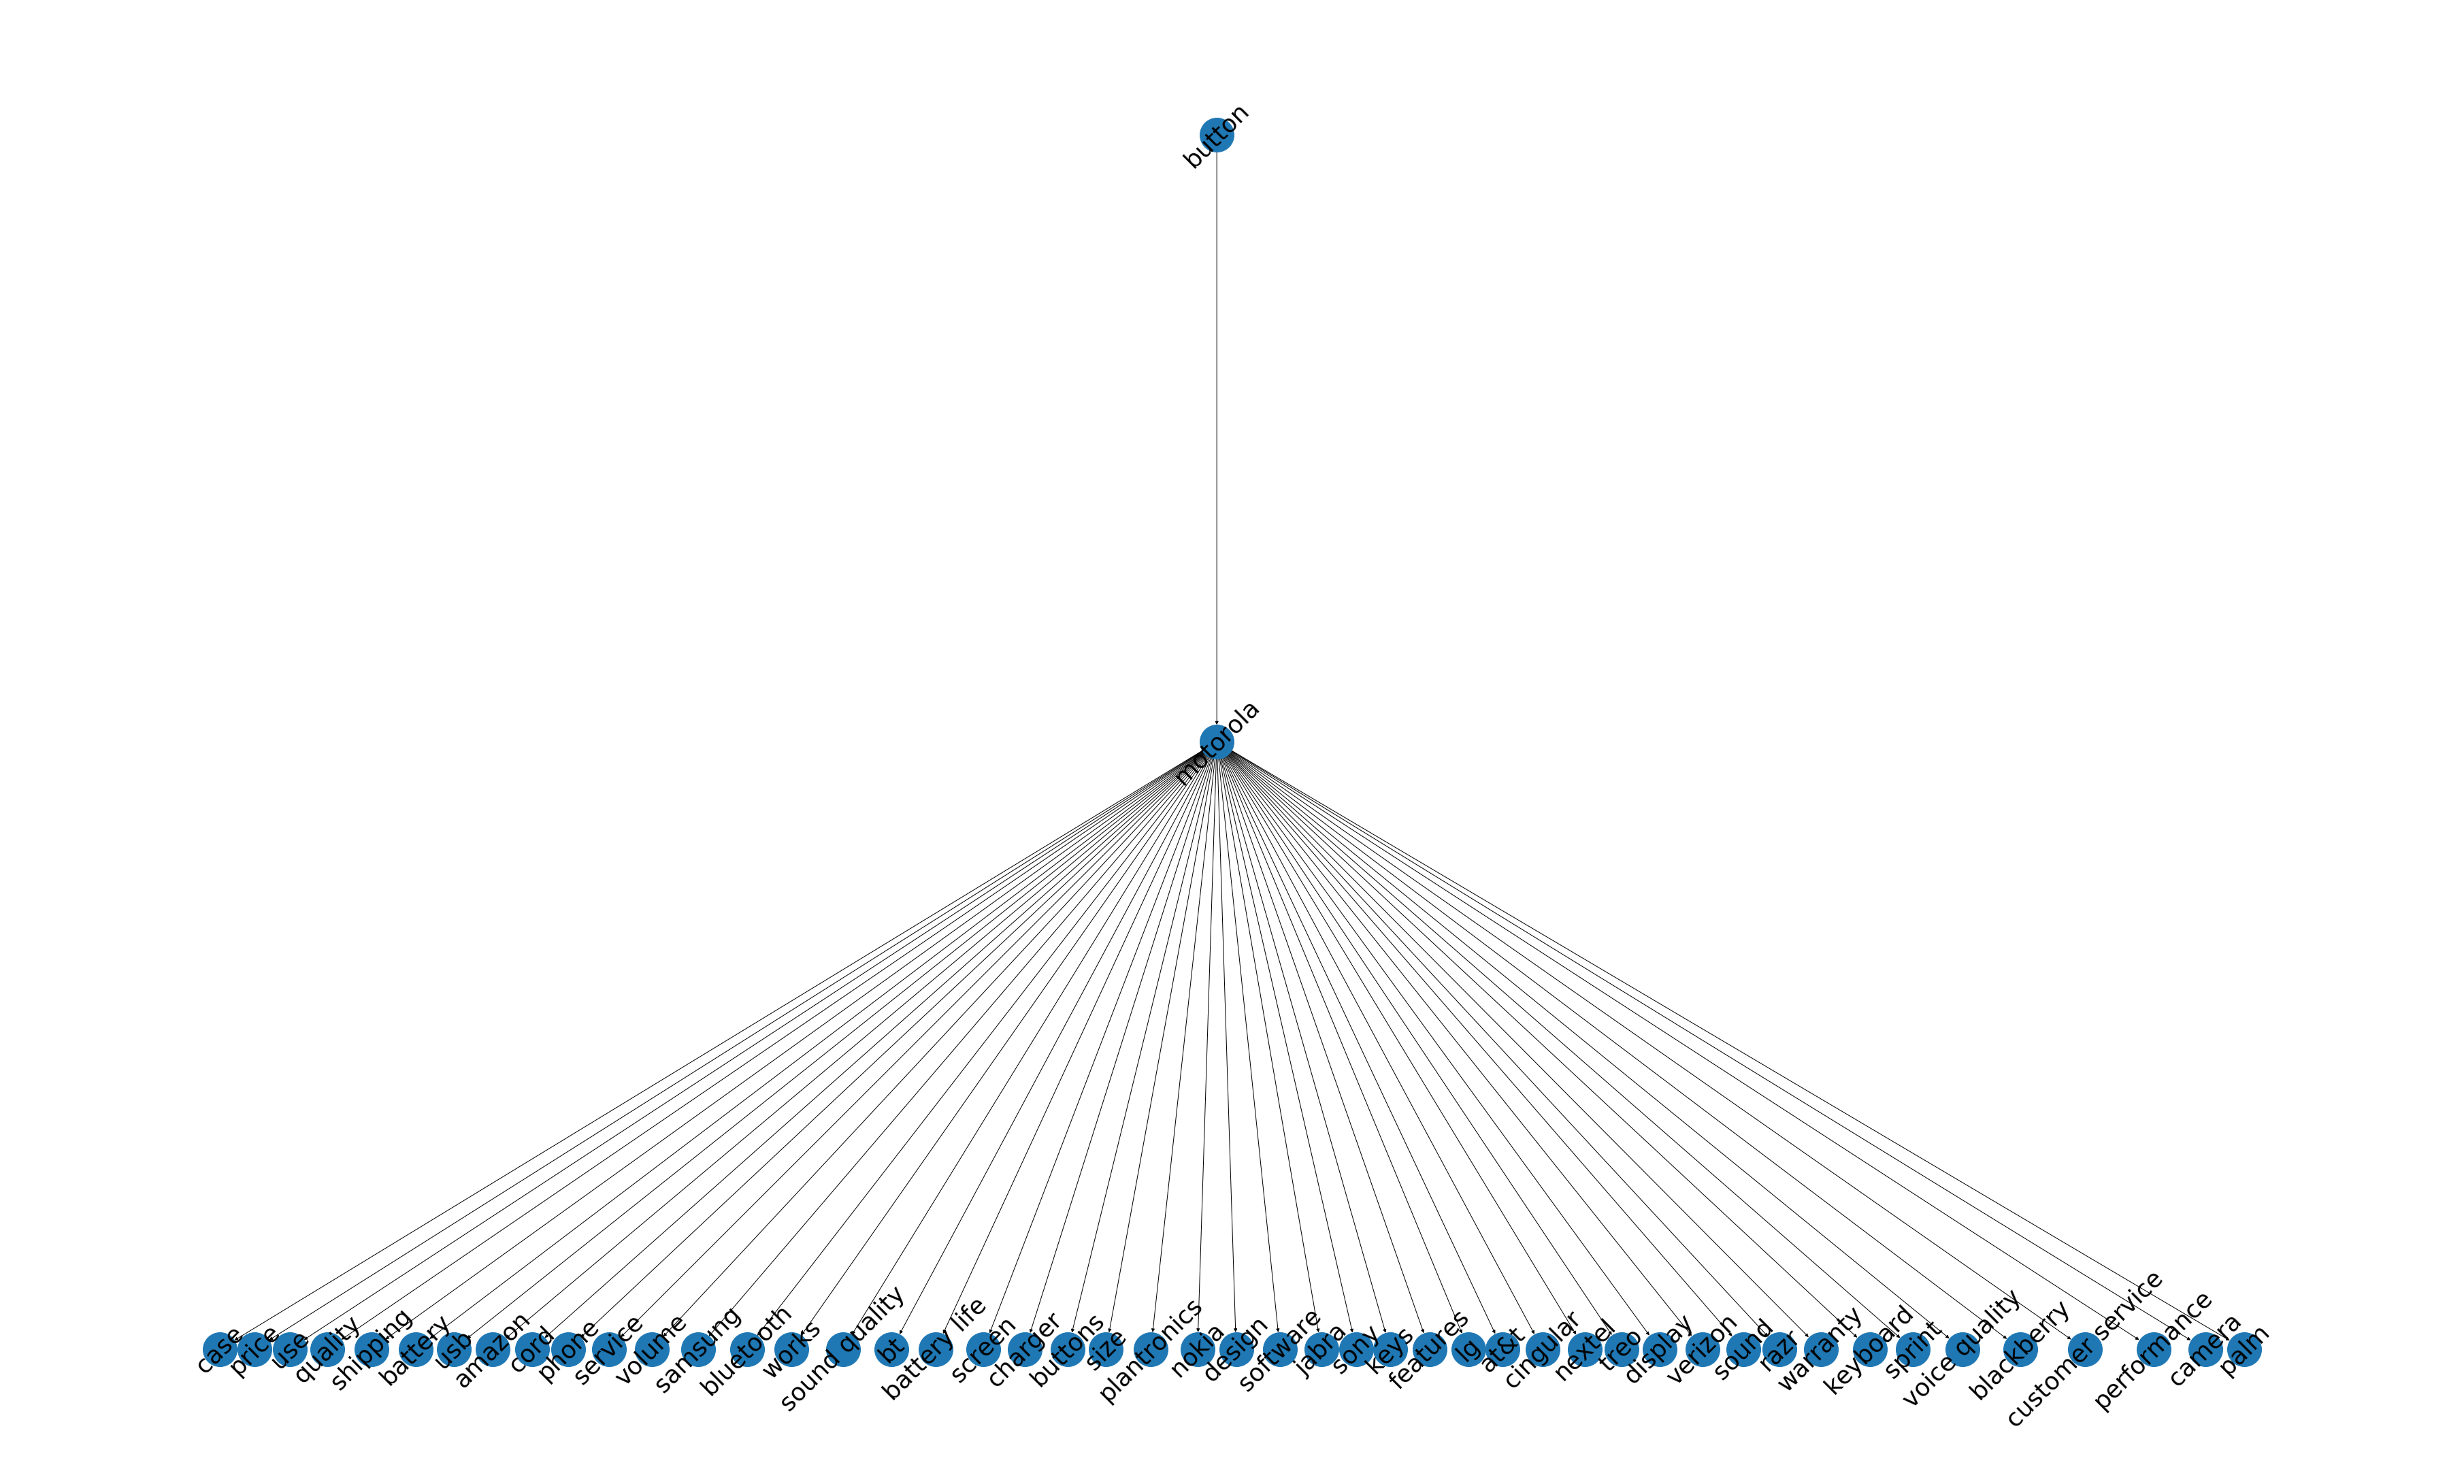

In [11]:
draw_tree(aht_gerani_based, paths.experiment_path / 'aht_gerani_based_root_node_highest_wpr')

In [12]:
node_with_top_degree_aht = sorted(list(aht.degree()), key=lambda node_degree_pair: node_degree_pair[1], reverse=True)[0][0]

In [13]:
node_with_top_degree_aht

'motorola'

In [35]:
# draw_tree(nx.bfs_tree(aht, top_degree_aht), paths.output_path / 'aht_top_degree_aht')